<a href="https://colab.research.google.com/github/Loganstrong/School-Projects/blob/main/Titanic_DataMinging_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing packages and loading Titanic datasets
Data Source:https://www.kaggle.com/pavlofesenko/titanic-extended

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
from sklearn import datasets

%matplotlib inline

In [ ]:
Titanic_full = pd.read_csv('/content/full.csv')

Titanic_full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


#Cleaning Datasets

In [ ]:
train = Titanic_full.drop(columns =['PassengerId','Cabin','Ticket', 'Hometown', 'Boarded', 'Destination','Name','WikiId', 'Name_wiki', 'Age_wiki', 'Lifeboat', 'Body', 'Class'])

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


In [ ]:
train=train.dropna()

## Exploratory analysis

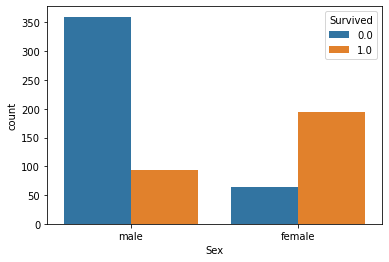

In [ ]:
sns.countplot(data=train, x='Sex', hue='Survived')
plt.show()

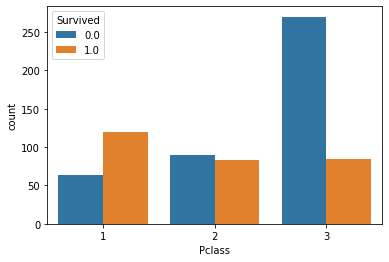

In [ ]:
sns.countplot(data=train, x='Pclass', hue='Survived')
plt.show()

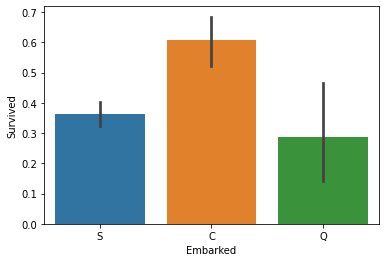

In [ ]:
sns.barplot(x="Embarked", y= "Survived", data = train)

# The mean age value in each of the Pclass.

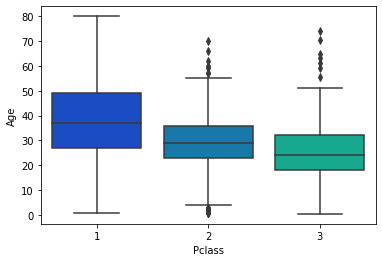

In [ ]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [ ]:
print(train.Survived.value_counts())

0.0    424
1.0    288
Name: Survived, dtype: int64


In [ ]:
corr = train.corr()

corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


In [ ]:
sns.color_palette(sns.diverging_palette(230, 30))

[(0.26613466399181535, 0.47369810827813025, 0.7317615976606106),
 (0.5370642947070804, 0.6624089282430076, 0.8193382948975503),
 (0.8106397225972991, 0.8529626273091042, 0.9077702333184445),
 (0.8995768430849336, 0.8351861014706161, 0.8016094135264383),
 (0.793363233659419, 0.6109064387541839, 0.511799334984035),
 (0.6881768351567816, 0.388795825000193, 0.22479206184339562)]

Correlation Heatmap of the Titanic

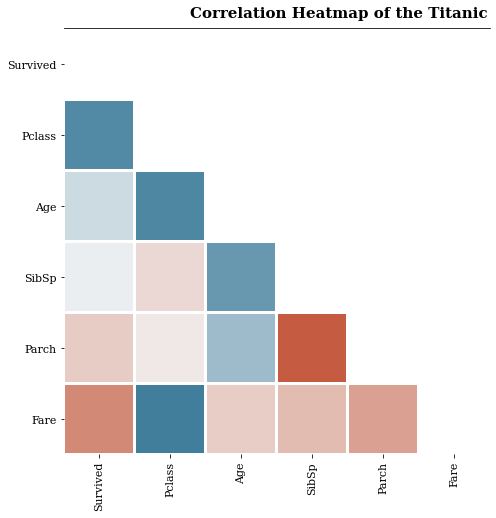

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, 
            square=True, 
            mask=mask,
            linewidth=2.5, 
            vmax=0.4, vmin=-0.4, 
            cmap=cmap, 
            cbar=False, 
            ax=ax)

ax.set_yticklabels(ax.get_xticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.spines['top'].set_visible(True)

fig.text(0.97, 1, 'Correlation Heatmap of the Titanic', fontweight='bold', fontfamily='serif', fontsize=15, ha='right')    
    

plt.tight_layout()
plt.show()

In [ ]:
#map each sex value to a numberical value
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)

Spliting dataset to train and test using train_test_split function

In [ ]:
from sklearn.model_selection import train_test_split

x=train.drop("Survived",axis=1)
x=x.drop("Embarked",axis=1)

y=train["Survived"] 

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

In [ ]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...
885,3,1,39.0,0,5,29.1250
886,2,0,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
889,1,0,26.0,0,0,30.0000


In [ ]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
885    0.0
886    0.0
887    1.0
889    1.0
890    0.0
Name: Survived, Length: 712, dtype: float64

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


scaler = StandardScaler()
logreg = LogisticRegression()

pipeline = Pipeline([('transformer', scaler), ('estimator', logreg)])

pipeline.fit(x_train, y_train)

x_test_scaled = scaler.transform(x_test)
y_pred = logreg.predict(x_test_scaled)

print(accuracy_score(y_test,y_pred))

0.7710280373831776


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.80      0.80       126
         1.0       0.72      0.73      0.72        88

    accuracy                           0.77       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.77      0.77      0.77       214



Decision Tree

In [ ]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7616822429906542


In [ ]:
!pip install graphviz

!pip install pydotplus

! pip install six

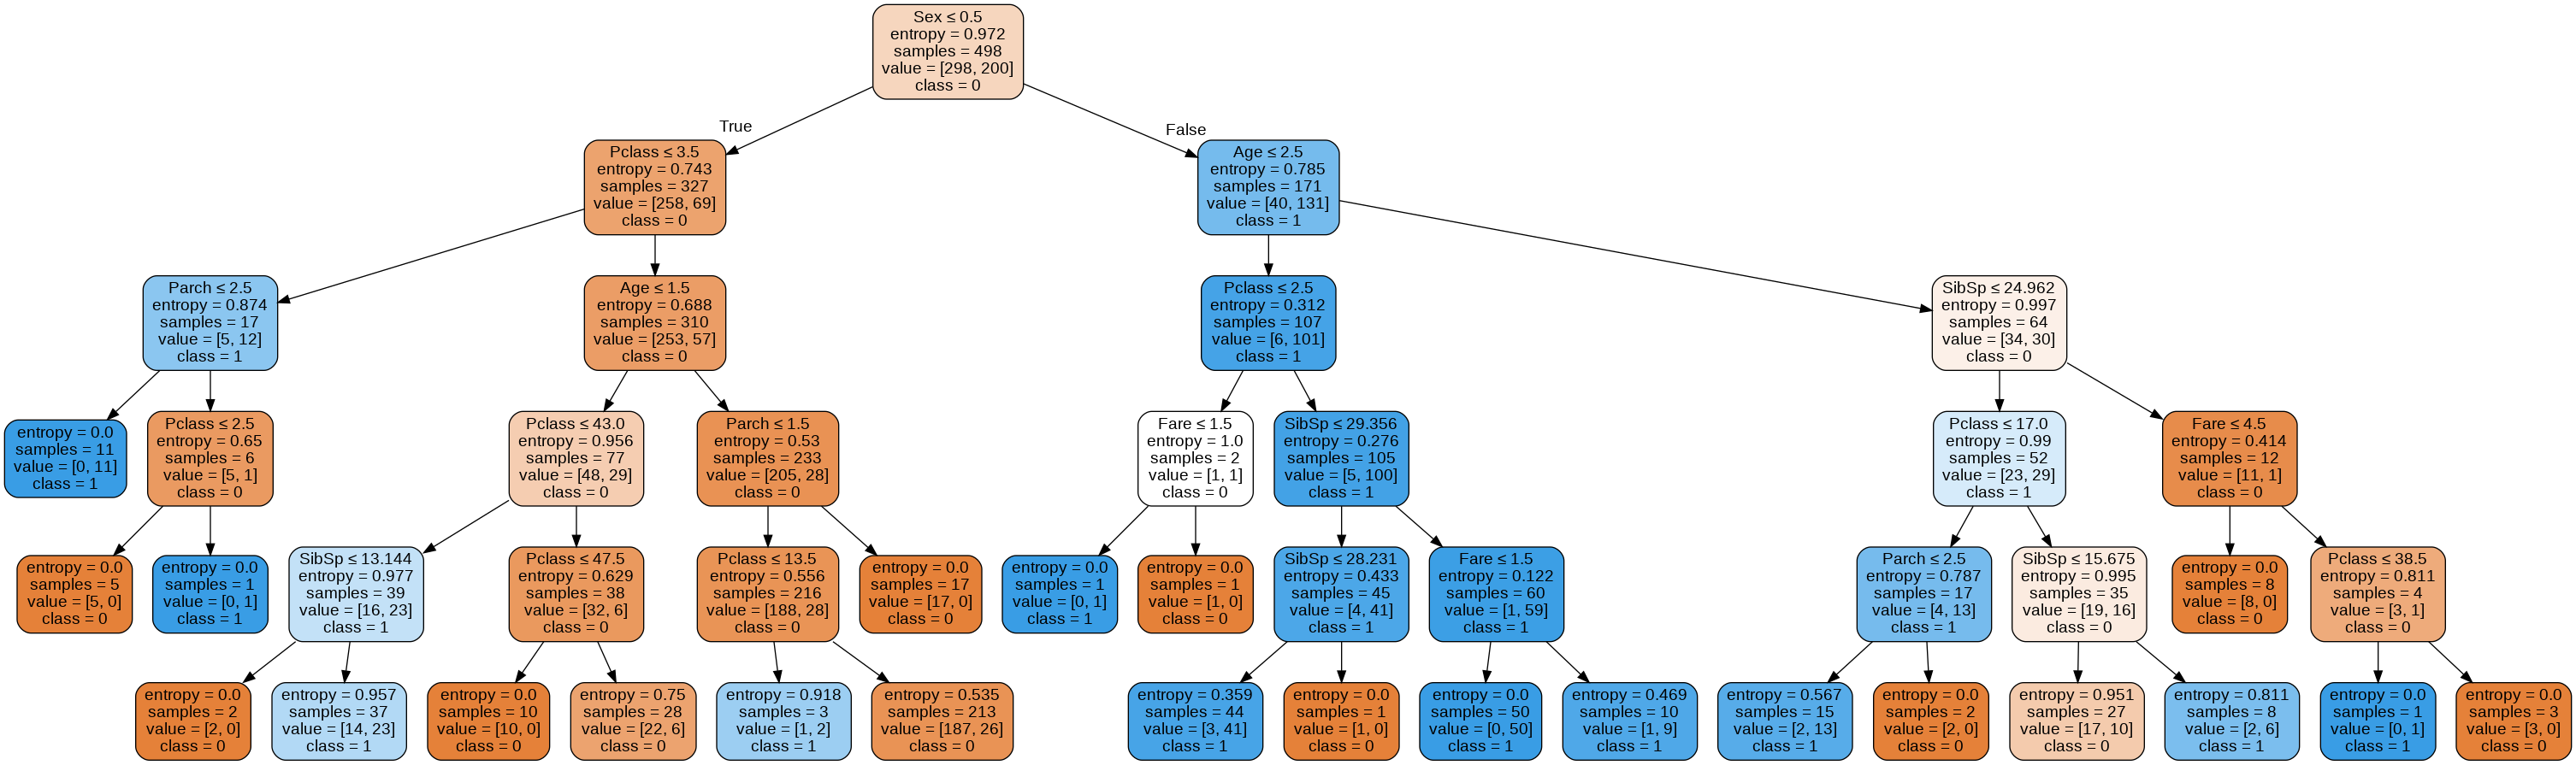

In [ ]:
#Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz
#Import stringIO from sklearn.externals.six
from sklearn.externals.six import StringIO 


#import Image from IPython.display
from IPython.display import Image 
#Import pydotplus
import pydotplus
feature_col = ['Age', 'Sex', 'Pclass', 'Parch', 'Fare', 'SibSp']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_col,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Titanic.png')
Image(graph.create_png())

Optimizing Decision Tree Performance

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7757009345794392


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.84      0.82       126
         1.0       0.75      0.68      0.71        88

    accuracy                           0.78       214
   macro avg       0.77      0.76      0.76       214
weighted avg       0.77      0.78      0.77       214



Well, the classification rate increased to 77.6%, which is better accuracy than the previous model

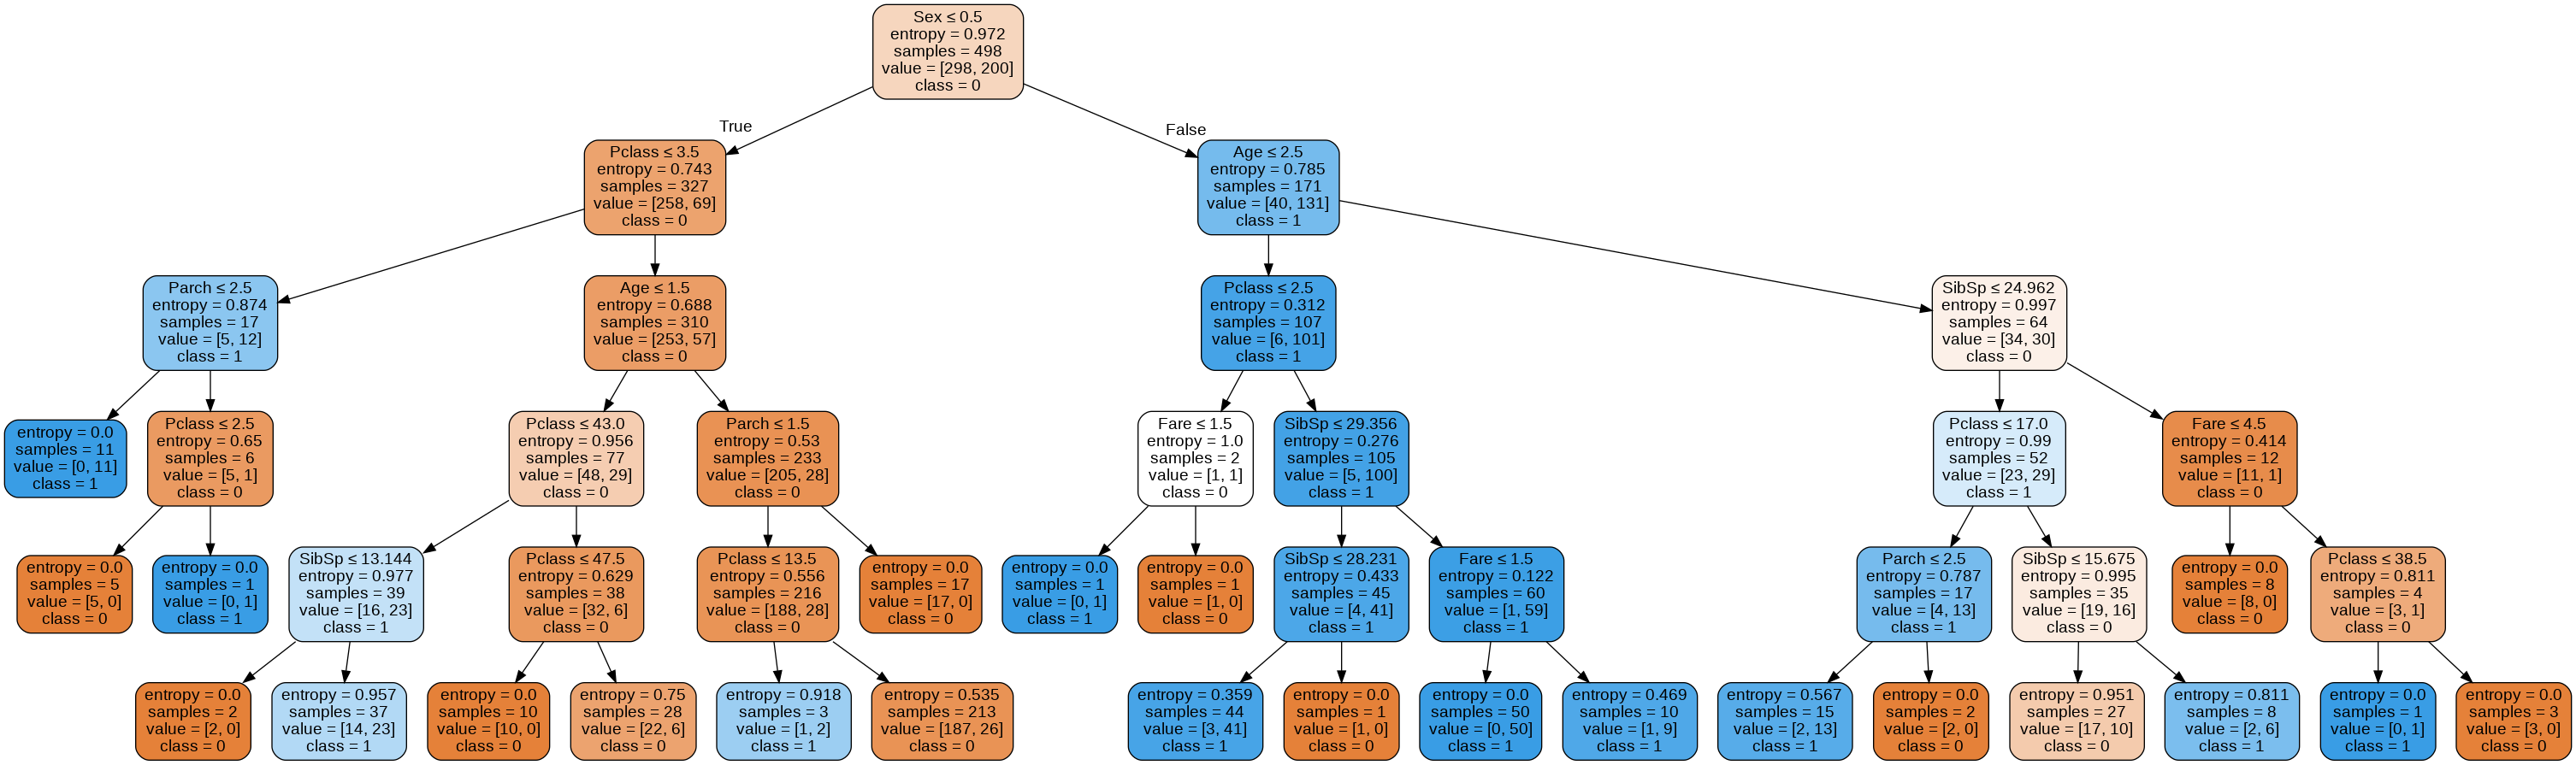

In [ ]:
#Import stringIO from sklearn.externals.six
from six import StringIO 
#import Image from IPython.display 
from IPython.display import Image 
#Import export_graphviz from sklearn.tree 
from sklearn.tree import export_graphviz
#import pydotplus
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_col,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Tita.png')
Image(graph.create_png())